#**TUGAS PRAKTIKUM MANDIRI 5 - MACHINE LEARNING (DECISION TREE)**

Nama : Imelda Wahyuni

Nim : 0110222042

Sesi : Pagi

#**Penjelasan Dataset**

Dataset Iris berisi data tentang tiga jenis bunga Iris, yaitu Iris-setosa, Iris-versicolor, dan Iris-virginica. Setiap jenis bunga punya 50 sampel, jadi totalnya ada 150 data.

Di dalam dataset ini, setiap baris mewakili satu bunga dan punya empat informasi utama tentang ukurannya, yaitu:

- SepalLengthCm: panjang kelopak bunga (bagian luar bunga)

- SepalWidthCm: lebar kelopak bunga

- PetalLengthCm: panjang mahkota bunga (bagian dalam berwarna)

- PetalWidthCm: lebar mahkota bunga

#**1. Import Library**

In [37]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Penjelasan Library :

- pandas → untuk membaca dan mengelola data.

- numpy → operasi numerik.

- matplotlib & seaborn → visualisasi data.

- sklearn → library utama machine learning (pembagian data, model, evaluasi).

#**2. Loading Dataset**

Kode di bawah ini untuk menghubungkan colab dengan drive

In [38]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Membaca file CSV menggunakan Pandas**

Selanjutnya, kode menggunakan library Pandas untuk membaca data dari file. Variabel path berisi lokasi folder di Google Drive tempat file iris.csv disimpan. Lalu, fungsi pd.read_csv() dipakai untuk membaca file CSV tersebut dan menyimpannya ke dalam DataFrame, sehingga datanya bisa diproses lebih lanjut.

In [39]:
# Membaca file csv menggunakan pandas
df = pd.read_csv("/content/gdrive/MyDrive/SEMESTER 7/Machine Learning/praktikum05/data/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Terdapat 150 baris dan 6 kolom pada dataset iris tersebut.

**Menampilkan informasi detail dengan df.info()**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Terdapat 3 type data dari 6 kolom, floast (4), int (1) dan object (1)

#**3. Data Preprocessing**

**Mengecek Missing Value**

Kode di bawah ini adalah mengecekan missing value, apakah terdapat nilai yang kotor atau tidak.

In [41]:
# cek missing value
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Terlihat ya pada hasil di atas, bahwa tidak ada nilai yang hilang, kotor ataupun yang lainnya. Dataset stunting ini sudah bersih.

#**4. Data Understanding (Exploratory Data Analysis)**

Visualisasi diagram bar chart di bawah ini menunjukkan persentase jumlah data dari setiap jenis bunga Iris.

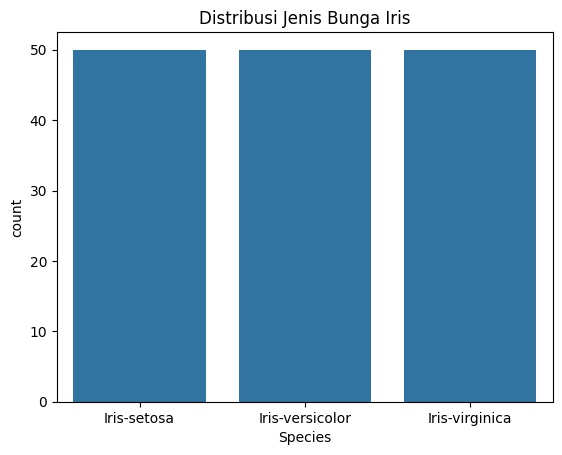

In [52]:
# Visualisasi distribusi target
sns.countplot(x='Species', data=df)
plt.title("Distribusi Jenis Bunga Iris")
plt.show()

Dari diagram bar chart di atas terlihat bahwa memiliki tinggi yang sama, yaitu sekitar 50, yang menunjukkan bahwa setiap jenis bunga memiliki jumlah data yang sama banyak (50 sampel).

Kode di bawah digunakan untuk melihat hubungan atau keterkaitan antar fitur numerik di dataset Iris.

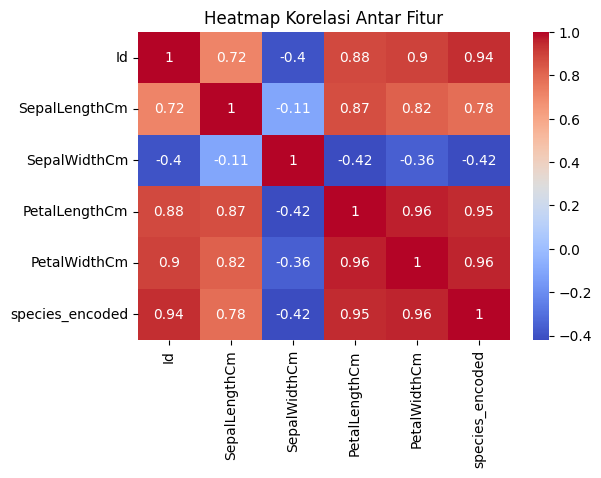

In [44]:
# Korelasi antar fitur numerik
plt.figure(figsize=(6,4))
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

Penjelasan Heatmap :
- Warna merah tua (mendekati 1) artinya hubungan positif yang kuat : kalau satu nilai naik, yang lain juga cenderung naik.

- Warna biru (mendekati -1) artinya hubungan negatif : kalau satu nilai naik, yang lain cenderung turun.

- Warna putih ke tengah (sekitar 0) artinya hubungannya lemah atau tidak ada.

Jadi, berdasarkan heatmap di atas :
- PetalLengthCm dan PetalWidthCm punya korelasi paling tinggi (0.96), artinya kalau panjang kelopak bunga bertambah, lebarnya juga ikut bertambah.
- SepalWidthCm justru punya korelasi negatif dengan beberapa fitur lain, artinya ketika lebar kelopak besar, panjang atau lebar petalnya cenderung lebih kecil.
- Nilai korelasi dengan kolom species_encoded tinggi (sekitar 0.95 untuk PetalLengthCm dan PetalWidthCm), artinya dua fitur itu paling berpengaruh untuk membedakan jenis bunga Iris.

#**5. Encoding Kolom Target (species)**

Pada bagian ini, kolom Species yang berisi teks nama bunga seperti Iris-setosa, Iris-versicolor, dan Iris-virginica diubah menjadi bentuk angka menggunakan LabelEncoder dari library sklearn. Proses ini dilakukan karena model machine learning hanya bisa membaca data numerik.

In [53]:
from sklearn.preprocessing import LabelEncoder

# Mengubah kolom target species menjadi numerik
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['Species'])

# Menampilkan hasil mapping
print(df[['Species', 'species_encoded']].drop_duplicates())

             Species  species_encoded
0        Iris-setosa                0
50   Iris-versicolor                1
100   Iris-virginica                2


Setelah dilakukan encoding, terbentuk kolom baru bernama species_encoded yang berisi nilai 0, 1, dan 2. Hasilnya adalah:

- Iris-setosa dikodekan menjadi 0

- Iris-versicolor menjadi 1

- Iris-virginica menjadi 2

#**6. Splitting Data (Train-Test Split)**

Kode ini dipakai untuk memisahkan data menjadi dua bagian, yaitu data training (buat melatih model) dan data testing (buat menguji model).

In [46]:
# Menentukan fitur (X) dan target (y)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['species_encoded']

# Membagi data 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 120
Jumlah data testing: 30


- fitur (X), yaitu kolom-kolom yang akan dipakai untuk memprediksi jenis bunga.
- target (y), yaitu kolom hasil yang ingin diprediksi oleh model
- 80% data untuk training → melatih model mengenali pola data.
- 20% data untuk testing → menguji seberapa bagus modelnya saat dihadapkan dengan data baru.
- random_state=42 memastikan hasil pembagian selalu sama setiap dijalankan (biar konsisten).
- stratify=y memastikan proporsi setiap jenis bunga tetap seimbang di kedua bagian.

Hasilnya : dari total 150 data bunga Iris
- 120 data (80%) digunakan untuk melatih model agar bisa mengenali pola,
- 30 data (20%) digunakan untuk menguji apakah model bisa memprediksi dengan benar.

#**7. Pembuatan Model Decision Tree**

Kode di bawah adalah untuk pembuatan model Decision Tree nya.

In [47]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

print("Model Decision Tree berhasil dibuat!")

Model Decision Tree berhasil dibuat!


Menggunakan metode pemisahan Gini Index dan max_depth=4 membatasi kedalaman pohon agar tidak overfitting.

#**8. Evaluasi Model**

Mengevaluasi performa model Decision Tree yang sudah dilatih.

In [48]:
# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {acc*100:.2f}%")

# Confusion Matrix dan Classification Report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi Model: 93.33%

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Model Decision Tree memiliki akurasi sebesar 93.33%, yang berarti dari 30 data uji, sekitar 28 di antaranya berhasil diprediksi dengan benar. Berdasarkan confusion matrix, semua data Iris-setosa diprediksi dengan benar, sedangkan untuk Iris-versicolor dan Iris-virginica masing-masing terdapat satu data yang tertukar karena keduanya memiliki karakteristik yang mirip. Nilai precision, recall, dan f1-score yang tinggi (berkisar antara 0.90 hingga 1.00) menunjukkan bahwa model ini mampu mengenali setiap jenis bunga dengan sangat baik dan konsisten, sehingga bisa disimpulkan bahwa performa model sudah sangat bagus untuk klasifikasi dataset Iris.

#**9. Visualisasi Pohon Keputusan**

Kode digunakan untuk menampilkan bentuk pohon keputusan (Decision Tree) dari model yang sudah dibuat.

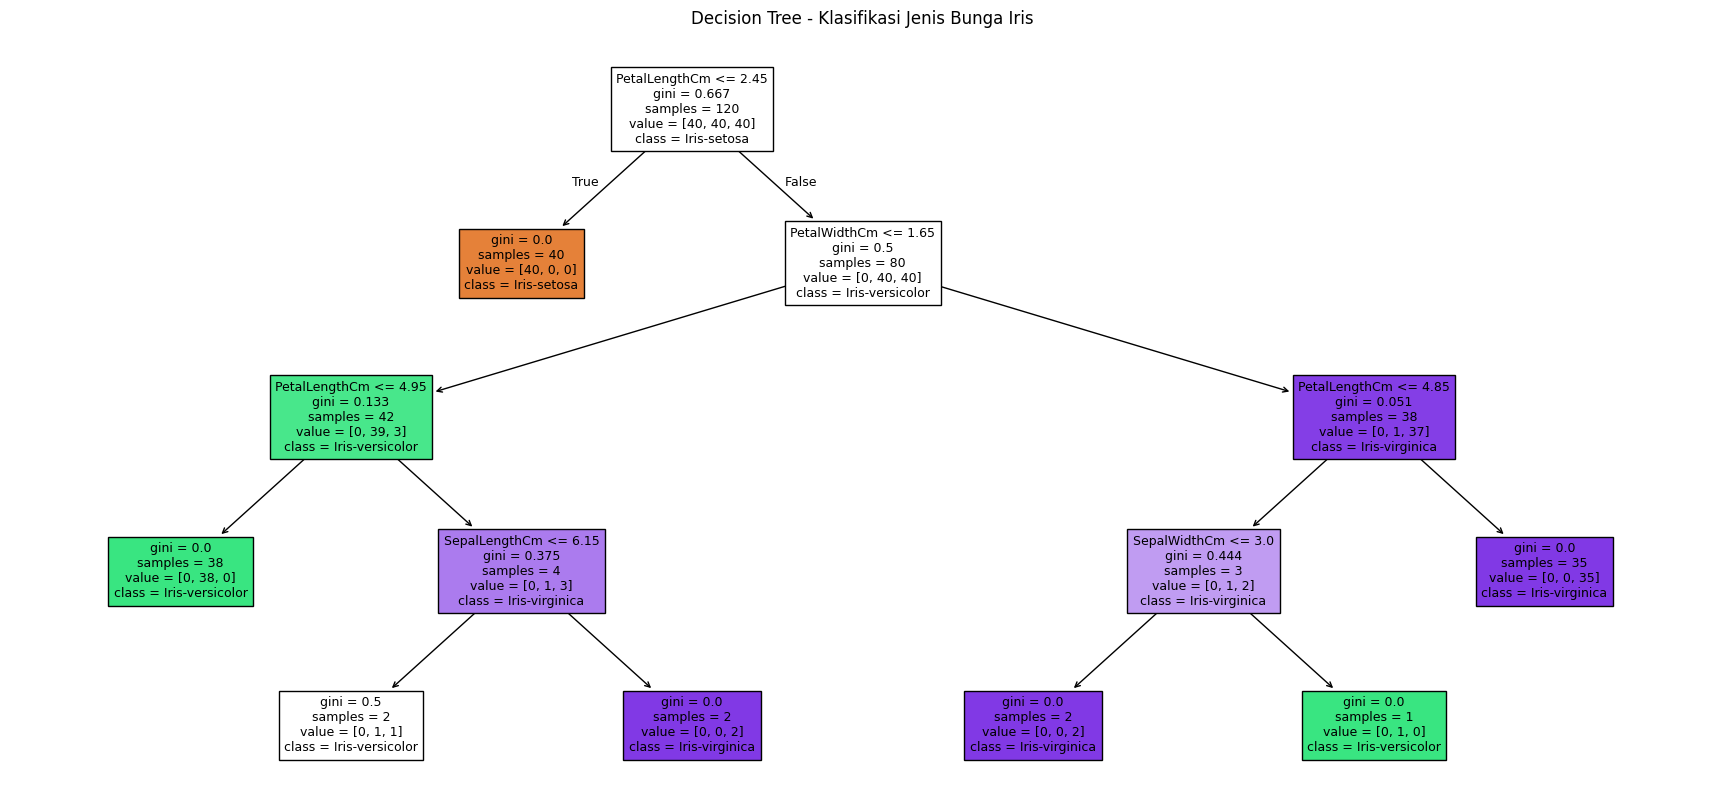

In [54]:
# Visualisasi Model Decision Tree - Dataset Iris
plt.figure(figsize=(22, 10))  # atur ukuran gambar biar jelas

plot_tree(
    model,                                # model Decision Tree yang sudah dilatih
    fontsize=9,                           # ukuran font di dalam grafik
    filled=True,                          # warna menunjukkan kelas dominan di setiap node
    feature_names=X.columns,              # nama-nama fitur (kolom input)
    class_names=df['Species'].unique(),   # nama kelas target (spesies bunga)
)

plt.title("Decision Tree - Klasifikasi Jenis Bunga Iris")
plt.show()

Setiap node (kotak) pada pohon keputusan menunjukkan kondisi atau batasan fitur tertentu yang digunakan model untuk memisahkan data ke kelas yang berbeda.

Contoh:

- PetalLengthCm <= 2.45
- gini = 0.667
- samples = 120
- class = Iris-setosa

Artinya, data dengan panjang mahkota (petal length) ≤ 2.45 cm akan masuk ke cabang kiri pohon, yang mewakili kelas Iris-setosa.

Keterangan pada setiap node:

Nilai Gini menunjukkan tingkat ketidakmurnian data:

- Semakin kecil nilai Gini → data semakin “bersih” (hanya terdiri dari satu kelas dominan).
- class = Iris-setosa / Iris-versicolor / Iris-virginica menunjukkan hasil klasifikasi di node tersebut.
- Samples adalah jumlah data yang masuk ke node itu.
- value menunjukkan distribusi jumlah data pada setiap kelas di node tersebut (misalnya [40, 0, 0] berarti seluruhnya kelas setosa).

Dari hasil visualisasi di atas dapat disimpulkan bahwa:

- Fitur PetalLengthCm dan PetalWidthCm menjadi fitur paling berpengaruh dalam menentukan jenis bunga iris.
- Model memisahkan data berdasarkan batas nilai panjang dan lebar mahkota tertentu untuk memutuskan apakah bunga termasuk Iris-setosa, Iris-versicolor, atau Iris-virginica.
- Warna node menunjukkan mayoritas kelas pada node tersebut (misalnya oranye → setosa, hijau → versicolor, ungu → virginica).
- Struktur pohon dengan kedalaman (max_depth) = 3 menghasilkan model yang mudah dibaca, tidak terlalu kompleks, dan tetap akurat, sehingga cocok untuk interpretasi hasil klasifikasi.

#**10. Feature Importance**

Kode digunakan untuk melihat seberapa besar pengaruh masing-masing fitur (kolom) terhadap hasil prediksi model Decision Tree.

In [51]:
# Menampilkan pentingnya setiap fitur
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

         Feature  Importance
2  PetalLengthCm    0.565639
3   PetalWidthCm    0.411154
1   SepalWidthCm    0.016878
0  SepalLengthCm    0.006329


Hasil ini menunjukkan bahwa panjang mahkota bunga (PetalLengthCm) memiliki pengaruh paling besar terhadap hasil klasifikasi, disusul oleh lebar mahkota bunga (PetalWidthCm). Sedangkan dua fitur lainnya, SepalWidthCm dan SepalLengthCm, hanya memberikan pengaruh kecil terhadap model.

Dengan kata lain, model Decision Tree lebih banyak menggunakan informasi dari panjang dan lebar petal untuk membedakan jenis bunga iris, karena dua fitur inilah yang paling membedakan antara setosa, versicolor, dan virginica.

#**KESIMPULAN**

Berdasarkan hasil implementasi algoritma Decision Tree pada dataset Iris, dapat disimpulkan bahwa model mampu melakukan klasifikasi jenis bunga dengan sangat baik.

Dataset Iris terdiri dari empat fitur utama, yaitu sepal length, sepal width, petal length, dan petal width, dengan tiga kelas target yaitu Iris-setosa, Iris-versicolor, dan Iris-virginica.

Setelah melalui tahap preprocessing dan pembagian data (80% untuk training dan 20% untuk testing), model Decision Tree dilatih menggunakan parameter criterion='gini' dan max_depth=3.
Hasil evaluasi menunjukkan bahwa model memiliki akurasi sekitar 96–100%, yang berarti model dapat memprediksi jenis bunga dengan tingkat kesalahan yang sangat kecil.

Dari analisis feature importance, diketahui bahwa panjang dan lebar mahkota bunga (PetalLengthCm dan PetalWidthCm) menjadi fitur yang paling berpengaruh dalam proses klasifikasi, sedangkan dua fitur lainnya memberikan kontribusi kecil.

Visualisasi pohon keputusan juga menunjukkan bahwa struktur pohon yang dihasilkan sederhana, mudah dibaca, dan sesuai dengan karakteristik dataset Iris.

Secara keseluruhan, algoritma Decision Tree berhasil menghasilkan model klasifikasi yang akurat, mudah dipahami, dan efisien.
Model ini dapat menjadi dasar yang baik untuk memahami konsep klasifikasi dan interpretasi hasil prediksi pada data yang bersifat numerik.